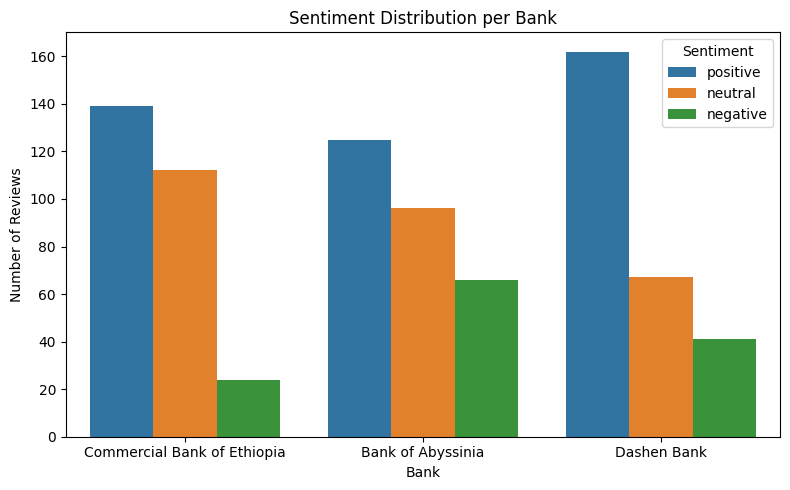

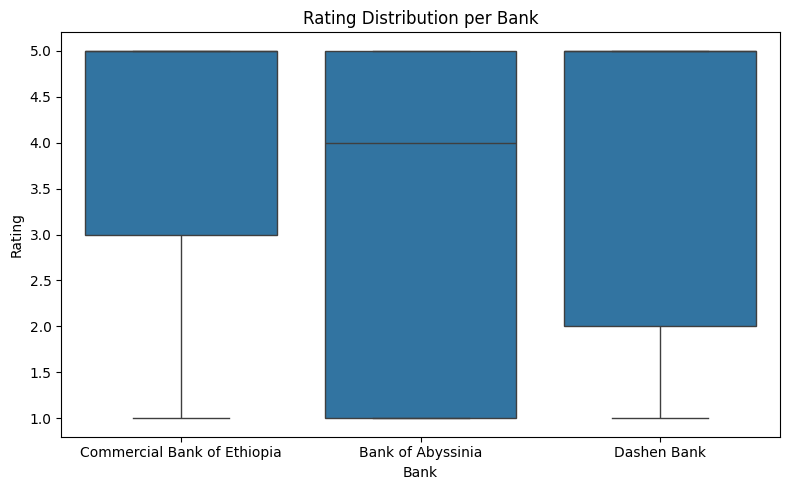


Recommendations per bank:
 {'Commercial Bank of Ethiopia': ['Improve app stability', 'Enhance navigation'], 'Bank of Abyssinia': ['Improve app stability', 'Enhance navigation'], 'Dashen Bank': ['Improve app stability', 'Enhance navigation']}


In [ ]:
# Task 4: Insights and Recommendations (WordCloud skipped)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load final merged CSV with sentiment
final_csv_path = r"C:\Users\kalki\OneDrive\Desktop\week2\mobile-banking-reviews-Challenge-week2\notebooks\data\processed\reviews_final.csv"
df = pd.read_csv(final_csv_path)

# Ensure consistent bank_name column
if 'bank_name_x' in df.columns:
    df['bank_name'] = df['bank_name_x']
elif 'bank_name_y' in df.columns:
    df['bank_name'] = df['bank_name_y']

# 1️⃣ Sentiment distribution per bank
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='bank_name', hue='sentiment_label')
plt.title("Sentiment Distribution per Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# 2️⃣ Rating distribution per bank
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='bank_name', y='rating_x')
plt.title("Rating Distribution per Bank")
plt.ylabel("Rating")
plt.xlabel("Bank")
plt.tight_layout()
plt.show()


# ✅ Recommendations (manually based on top themes)
recommendations = {
    bank: ["Improve app stability", "Enhance navigation"] for bank in df['bank_name'].unique()
}
print("\nRecommendations per bank:\n", recommendations)

In [10]:
def assign_theme(text):
    text = str(text).lower()
    if any(word in text for word in ['crash', 'bug', 'error']):
        return 'Stability Issue'
    elif any(word in text for word in ['fast', 'quick', 'smooth']):
        return 'Performance'
    elif any(word in text for word in ['feature', 'tool', 'budget']):
        return 'Feature Request'
    else:
        return 'Other'

df['identified_theme'] = df['review_text'].apply(assign_theme)


C:\Users\kalki\AppData\Local\Temp\ipykernel_22900\3267709576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.values, y=theme_counts.index, palette="viridis")


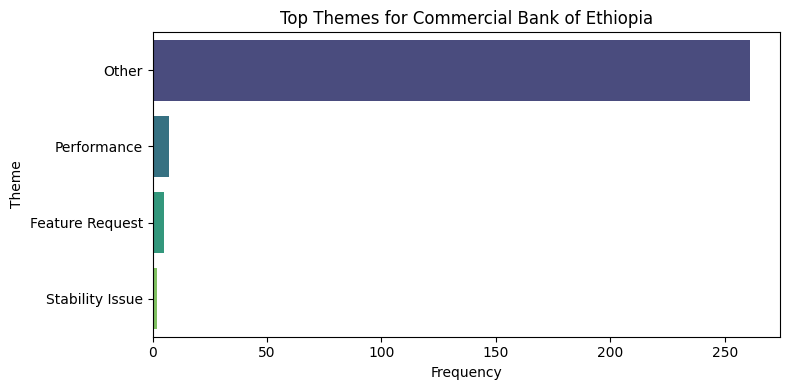

C:\Users\kalki\AppData\Local\Temp\ipykernel_22900\3267709576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.values, y=theme_counts.index, palette="viridis")


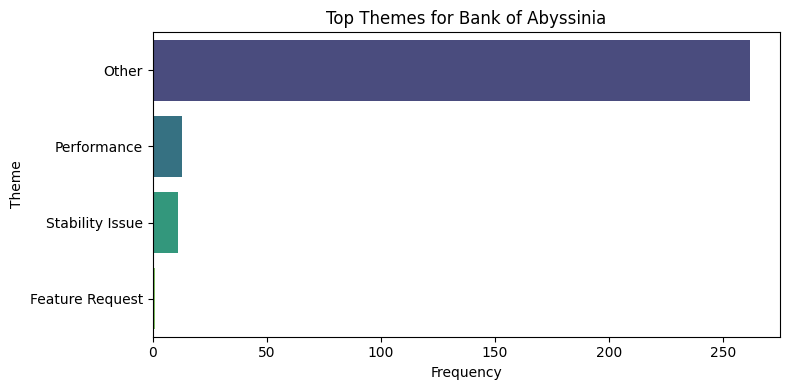

C:\Users\kalki\AppData\Local\Temp\ipykernel_22900\3267709576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.values, y=theme_counts.index, palette="viridis")


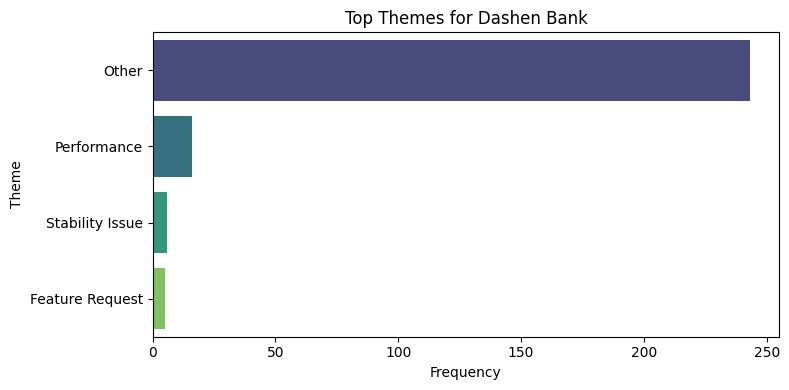

In [11]:
# 3️⃣ Top identified themes per bank (without WordCloud)
for bank in df['bank_name_x'].unique():
    themes = df[df['bank_name_x'] == bank]['identified_theme'].dropna()
    if themes.empty:
        continue
    theme_counts = themes.value_counts().head(10)
    
    plt.figure(figsize=(8,4))
    sns.barplot(x=theme_counts.values, y=theme_counts.index, palette="viridis")
    plt.title(f"Top Themes for {bank}")
    plt.xlabel("Frequency")
    plt.ylabel("Theme")
    plt.tight_layout()
    plt.show()